In [24]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
    
from smr import File
import numpy as np
from matplotlib import pyplot as plt
from kaveh.behavioral import oculomotor
from kaveh import plots

In [25]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B091108/B091108_1200_Adapt.smr'
smr_content = File(f_name)
smr_content.read_channels()

Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 5)
Not implemented (type = 5)


In [27]:
chan_titles = [chan.title for chan in smr_content.channels]
for i, ct in enumerate(chan_titles):
    print("{}: {}".format(i, ct))

0: Unit
1: H Eye
2: V Eye
3: H Targ
4: V Targ
5: Unit
6: H2 Targ
7: V2 Targ
8: Aux 1
9: Aux 2
10: Accept Sp
11: Saved Eve
12: Keyboard
13: Events


In [33]:
vt.__dict__

{'blocks': [2536960,
  2545664,
  3094528,
  3610624,
  4071424,
  4587520,
  5136384,
  5652480,
  6168576,
  6684672,
  7233536,
  7749632,
  8265728,
  8781824,
  9330688,
  9846784,
  10362880,
  10911744,
  11427840,
  11943936,
  12460032,
  13008896,
  13469696,
  13985792,
  14501888,
  15050752,
  15566848,
  16082944,
  16599040,
  17147904,
  17664000,
  18180096,
  18696192,
  19245056,
  19761152,
  20277248,
  20793344,
  21342208,
  21858304,
  22374400,
  22835200,
  23384064,
  23900160,
  24416256,
  24965120,
  25481216,
  25997312,
  26513408,
  27062272,
  27578368,
  28094464,
  28610560,
  29159424,
  29675520,
  30191616,
  30707712,
  35309056,
  35317760,
  35326464,
  35335168,
  35343872,
  35352576,
  35361280,
  35369984,
  35378688,
  35387392,
  35396096,
  35404800,
  35413504,
  35422208,
  38560768,
  39109632,
  39625728,
  40141824,
  40657920,
  41206784,
  41667584,
  42183680,
  42699776,
  43248640,
  43764736,
  44280832,
  44796928,
  45345792

In [48]:
print((159149568 - 2536960)*0.001)
print(132900907*0.01)
print(vt.data.size)

156612.608
1329009.07
1329010


In [59]:
vt = smr_content.get_channel(4)
ve = smr_content.get_channel(2)

ht = smr_content.get_channel(3)
he = smr_content.get_channel(1)

t_range = (0,700) #s
fsize =  (20,5)
i_range = [int(x/vt.dt) for x in t_range]
prange = slice(i_range[0], i_range[1])



In [30]:
num_clusters = 3 # number of jump types
tt = oculomotor.target(vt.data[prange], ht.data[prange], ht.dt, 'horizontal')
target_jumps_to = tt.get_target_jumps(num_clusters)


TypeError: 'int' object is not iterable

<IPython.core.display.Javascript object>


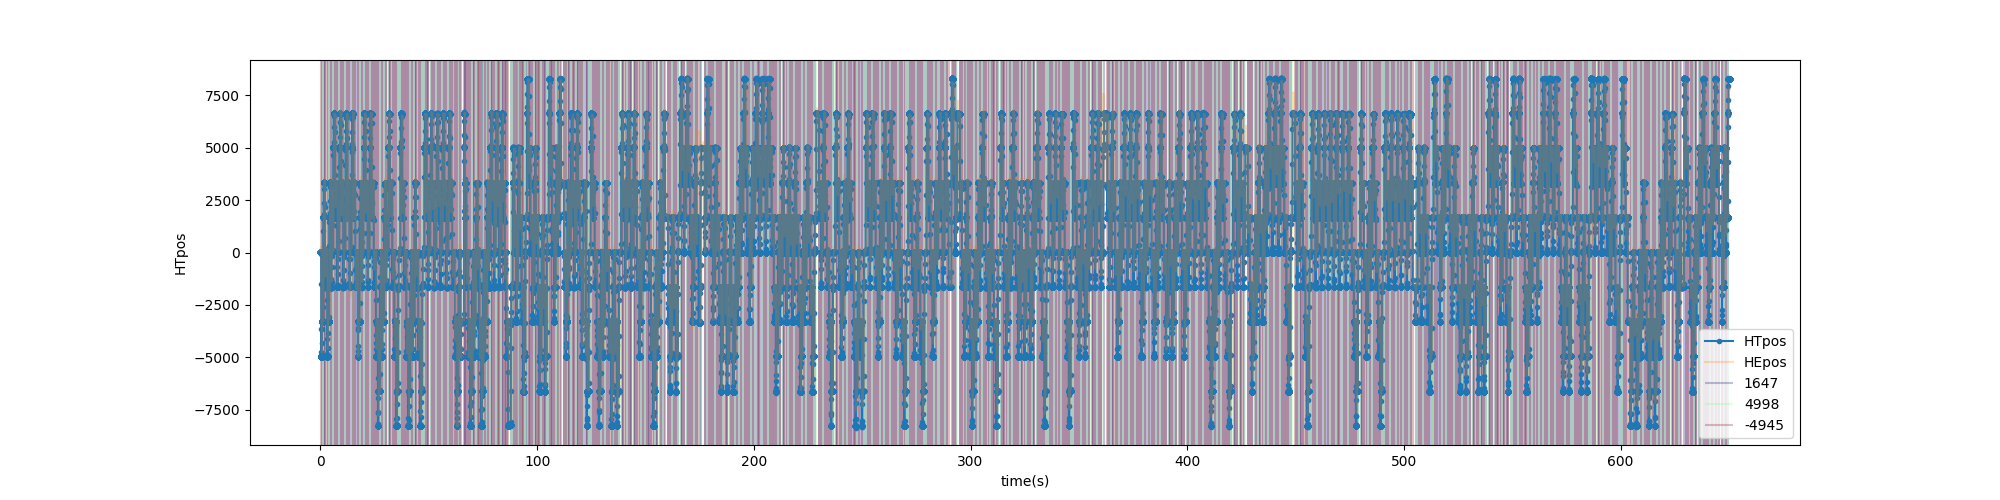

In [23]:
plt.figure(figsize = fsize)
# plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, ht.data[prange]/float(2*ht.divide),'.-')
# plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, he.data[prange]/float(2*ht.divide), alpha=0.25)

plt.plot(np.arange(0, tt.ht.size)*tt.dt, tt.ht, '.-')
plt.plot(np.arange(0, he.data[prange].size)*he.dt, he.data[prange], alpha=0.25)

plt.ylabel(ht.title)
plt.xlabel('time(s)')


jump_amps = target_jumps_to.keys()
colors = plt.cm.jet(np.linspace(0, 1, len(jump_amps)))
for i, ja in enumerate(jump_amps):
    plots.axvlines(plt.gca(), target_jumps_to[ja]*tt.dt, alpha = 0.25, color=colors[i])        

legend_labels = [ht.title , he.title] + [str(ja) for ja in jump_amps]
plt.legend(legend_labels)

